In [1]:
# Loading the relevant libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import random
import cv2
from skimage.transform import resize
import pickle

In [2]:
with open('crop_resized_images.pkl', 'rb') as file:
    X_array = pickle.load(file)

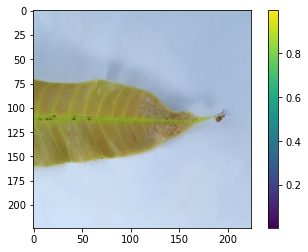

In [3]:
plt.figure()
plt.imshow(X_array[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [4]:
%store -r y_array

In [10]:
#  .pkl file
with open('y_array.pkl', 'wb') as f:
    pickle.dump(y_array, f)


In [5]:
train_images, test_images, train_labels, test_labels = train_test_split(X_array, y_array, test_size=0.2, random_state=42)

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [7]:
image_height = 224
image_width = 224
num_channels = 3  
num_classes = 8  
num_epochs = 10
batch_size = 15

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, num_channels)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))



learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=num_epochs, batch_size=batch_size, validation_data=(test_images, test_labels))

Epoch 1/10
214/214 [==============================] - 212s 966ms/step - loss: 1.4924 - accuracy: 0.4350 - val_loss: 1.1032 - val_accuracy: 0.5900
Epoch 2/10
214/214 [==============================] - 193s 903ms/step - loss: 0.8257 - accuracy: 0.6916 - val_loss: 0.5867 - val_accuracy: 0.8025
Epoch 3/10
214/214 [==============================] - 192s 898ms/step - loss: 0.5921 - accuracy: 0.7862 - val_loss: 0.5115 - val_accuracy: 0.8012
Epoch 4/10
214/214 [==============================] - 194s 903ms/step - loss: 0.4316 - accuracy: 0.8394 - val_loss: 0.3414 - val_accuracy: 0.8850
Epoch 5/10
214/214 [==============================] - 178s 833ms/step - loss: 0.3514 - accuracy: 0.8788 - val_loss: 0.2497 - val_accuracy: 0.9225
Epoch 6/10
214/214 [==============================] - 248s 1s/step - loss: 0.2751 - accuracy: 0.9081 - val_loss: 0.2319 - val_accuracy: 0.9200
Epoch 7/10
214/214 [==============================] - 184s 859ms/step - loss: 0.2589 - accuracy: 0.9081 - val_loss: 0.2326 - va

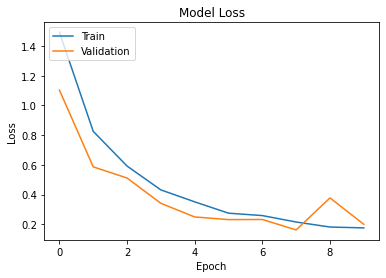

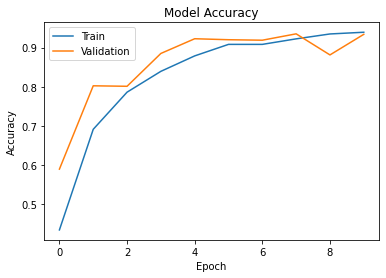

In [8]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [11]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier


In [13]:

def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, num_channels)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    learning_rate = 0.001
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

keras_classifier = KerasClassifier(build_fn=create_model, epochs=num_epochs, batch_size=batch_size)

train_sizes, train_scores, test_scores = learning_curve(
    keras_classifier, train_images, train_labels, cv=3, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#plt.plot(train_sizes, train_mean, label='Train')
#plt.plot(train_sizes, test_mean, label='Validation')
#plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
#plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
#plt.xlabel('Number of Training Samples')
#plt.ylabel('Score')
#plt.title('Learning Curves')
#plt.legend()
#plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_9316\3740722413.py:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_classifier = KerasClassifier(build_fn=create_model, epochs=num_epochs, batch_size=batch_size)


Epoch 1/10
15/15 [==============================] - 12s 695ms/step - loss: 2.4551 - accuracy: 0.1408
Epoch 2/10
15/15 [==============================] - 11s 707ms/step - loss: 1.9622 - accuracy: 0.2394
Epoch 3/10
15/15 [==============================] - 10s 664ms/step - loss: 1.7739 - accuracy: 0.3099
Epoch 4/10
15/15 [==============================] - 10s 647ms/step - loss: 1.5938 - accuracy: 0.4038
Epoch 5/10
15/15 [==============================] - 10s 662ms/step - loss: 1.3248 - accuracy: 0.4742
Epoch 6/10
15/15 [==============================] - 10s 659ms/step - loss: 1.0981 - accuracy: 0.5869
Epoch 7/10
15/15 [==============================] - 10s 667ms/step - loss: 0.9239 - accuracy: 0.6338
Epoch 8/10
15/15 [==============================] - 11s 704ms/step - loss: 0.5232 - accuracy: 0.7981
Epoch 9/10
15/15 [==============================] - 10s 663ms/step - loss: 0.4234 - accuracy: 0.8779
Epoch 10/10
15/15 [==============================] - 2s 163ms/step - loss: 0.2420 - accurac

100/100 [==============================] - 19s 191ms/step - loss: 0.1207 - accuracy: 0.9598
Epoch 1/10
114/114 [==============================] - 88s 723ms/step - loss: 1.8128 - accuracy: 0.3072
Epoch 2/10
114/114 [==============================] - 82s 720ms/step - loss: 1.2177 - accuracy: 0.5475
Epoch 3/10
114/114 [==============================] - 81s 715ms/step - loss: 0.7898 - accuracy: 0.7116
Epoch 4/10
114/114 [==============================] - 81s 710ms/step - loss: 0.6336 - accuracy: 0.7644
Epoch 5/10
114/114 [==============================] - 81s 713ms/step - loss: 0.4946 - accuracy: 0.8288
Epoch 6/10
114/114 [==============================] - 84s 739ms/step - loss: 0.4400 - accuracy: 0.8470
Epoch 7/10
114/114 [==============================] - 82s 717ms/step - loss: 0.3064 - accuracy: 0.8916
Epoch 8/10
114/114 [==============================] - 82s 715ms/step - loss: 0.2091 - accuracy: 0.9197
Epoch 9/10
114/114 [==============================] - 82s 715ms/step - loss: 0.1793 

57/57 [==============================] - 44s 768ms/step - loss: 0.4631 - accuracy: 0.8312
Epoch 9/10
57/57 [==============================] - 41s 720ms/step - loss: 0.3941 - accuracy: 0.8617
Epoch 10/10
57/57 [==============================] - 10s 182ms/step - loss: 0.0604 - accuracy: 0.9883
Epoch 1/10
72/72 [==============================] - 55s 743ms/step - loss: 2.0370 - accuracy: 0.1932
Epoch 2/10
72/72 [==============================] - 51s 705ms/step - loss: 1.5916 - accuracy: 0.3874
Epoch 3/10
72/72 [==============================] - 51s 709ms/step - loss: 1.3348 - accuracy: 0.5113
Epoch 4/10
72/72 [==============================] - 51s 711ms/step - loss: 1.0654 - accuracy: 0.6013
Epoch 5/10
72/72 [==============================] - 51s 706ms/step - loss: 0.9833 - accuracy: 0.6473
Epoch 6/10
72/72 [==============================] - 51s 704ms/step - loss: 0.8691 - accuracy: 0.7036
Epoch 7/10
72/72 [==============================] - 55s 765ms/step - loss: 0.5947 - accuracy: 0.7852


15/15 [==============================] - 13s 876ms/step - loss: 1.9059 - accuracy: 0.2394
Epoch 6/10
15/15 [==============================] - 11s 766ms/step - loss: 1.8867 - accuracy: 0.3099
Epoch 7/10
15/15 [==============================] - 11s 705ms/step - loss: 1.4791 - accuracy: 0.4038
Epoch 8/10
15/15 [==============================] - 10s 672ms/step - loss: 1.3735 - accuracy: 0.5164
Epoch 9/10
15/15 [==============================] - 10s 681ms/step - loss: 1.1958 - accuracy: 0.5962
Epoch 10/10
15/15 [==============================] - 4s 264ms/step - loss: 0.8423 - accuracy: 0.8216
Epoch 1/10
29/29 [==============================] - 29s 943ms/step - loss: 2.7017 - accuracy: 0.1690
Epoch 2/10
29/29 [==============================] - 28s 960ms/step - loss: 1.8406 - accuracy: 0.2582
Epoch 3/10
29/29 [==============================] - 24s 825ms/step - loss: 1.7492 - accuracy: 0.3028
Epoch 4/10
29/29 [==============================] - 21s 739ms/step - loss: 1.5520 - accuracy: 0.3991
E

114/114 [==============================] - 99s 867ms/step - loss: 1.0527 - accuracy: 0.5950
Epoch 4/10
114/114 [==============================] - 84s 734ms/step - loss: 0.8434 - accuracy: 0.6899
Epoch 5/10
114/114 [==============================] - 81s 708ms/step - loss: 0.6143 - accuracy: 0.7755
Epoch 6/10
114/114 [==============================] - 81s 710ms/step - loss: 0.5253 - accuracy: 0.8077
Epoch 7/10
114/114 [==============================] - 81s 715ms/step - loss: 0.4269 - accuracy: 0.8558
Epoch 8/10
114/114 [==============================] - 80s 706ms/step - loss: 0.4293 - accuracy: 0.8435
Epoch 9/10
114/114 [==============================] - 80s 699ms/step - loss: 0.3766 - accuracy: 0.8693
Epoch 10/10
114/114 [==============================] - 20s 171ms/step - loss: 0.0694 - accuracy: 0.9818
Epoch 1/10
128/128 [==============================] - 124s 923ms/step - loss: 2.0148 - accuracy: 0.2480
Epoch 2/10
128/128 [==============================] - 117s 916ms/step - loss: 1.24

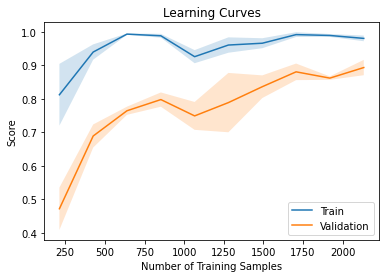

In [14]:
plt.plot(train_sizes, train_mean, label='Train')
plt.plot(train_sizes, test_mean, label='Validation')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel('Number of Training Samples')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend()
plt.show()